In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
air_quality = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv')
# air_quality = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv',parse_dates=['date.utc'])
air_quality = air_quality.rename(columns={'date.utc':'datetime'})
air_quality.head(2)

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³


In [4]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   datetime   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [6]:
# object 타입을 datetime으로 바꿔줌
# csv 불러올 때 parse_dates = True로 받아와도 됨
air_quality['datetime']=pd.to_datetime(air_quality['datetime'])

# 날짜/시간 연산

Timedelta: 시간     
Timestamp: 시각 (시점)

In [9]:
print(air_quality['datetime'].max())
print(air_quality['datetime'].min())

2019-06-21 00:00:00+00:00
2019-05-07 01:00:00+00:00


In [10]:
air_quality['datetime'].max()-air_quality['datetime'].min()

Timedelta('44 days 23:00:00')

# Timestamp에서 원하는 데이터 추출

In [12]:
air_quality['month'] = air_quality['datetime'].dt.month
air_quality[['month','datetime']].head(2)

,month,datetime
0,6,2019-06-21 00:00:00+00:00
1,6,2019-06-20 23:00:00+00:00


In [13]:
air_quality['year'] = air_quality['datetime'].dt.year
air_quality['weekofyear'] = air_quality['datetime'].dt.weekofyear
air_quality['quarter'] = air_quality['datetime'].dt.quarter
air_quality['hour'] = air_quality['datetime'].dt.hour
air_quality['weekday'] = air_quality['datetime'].dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [14]:
air_quality[['datetime','year','month','weekofyear','quarter','hour','weekday']].head(2)

,datetime,year,month,weekofyear,quarter,hour,weekday
0,2019-06-21 00:00:00+00:00,2019,6,25,2,0,4
1,2019-06-20 23:00:00+00:00,2019,6,25,2,23,3


In [15]:
air_quality

,city,country,datetime,location,parameter,value,unit,month,year,weekofyear,quarter,hour,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,2019,25,2,0,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,2019,25,2,23,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,2019,25,2,22,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,2019,25,2,21,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,2019,25,2,20,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5,2019,19,2,6,1
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5,2019,19,2,4,1
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,2019,19,2,3,1
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,2019,19,2,2,1


In [16]:
# 요일별 평균 보고싶을때

air_quality.groupby(['weekday','location'])['value'].mean()

weekday  location          
0        BETR801               27.875000
         FR04014               24.856250
         London Westminster    23.969697
1        BETR801               22.214286
         FR04014               30.999359
         London Westminster    24.885714
2        BETR801               21.125000
         FR04014               29.165753
         London Westminster    23.460432
3        BETR801               27.500000
         FR04014               28.600690
         London Westminster    24.780142
4        BETR801               28.400000
         FR04014               31.617986
         London Westminster    26.446809
5        BETR801               33.500000
         FR04014               25.266154
         London Westminster    24.977612
6        BETR801               21.896552
         FR04014               23.274306
         London Westminster    24.859155
Name: value, dtype: float64

In [17]:
#시간대 변화에 따른 변화 보고싶을 때
air_quality.groupby('hour')['value'].mean()

hour
0     27.955294
1     26.125688
2     23.558511
3     23.242683
4     22.979518
5     27.070732
6     30.635632
7     31.346591
8     29.138636
9     26.071591
10    22.602326
11    21.275294
12    21.029762
13    21.008235
14    21.737647
15    23.840000
16    24.972619
17    26.691667
18    27.089412
19    28.143529
20    29.372941
21    30.973256
22    32.451282
23    31.189412
Name: value, dtype: float64

Text(0.5, 0, 'Hours of the day')

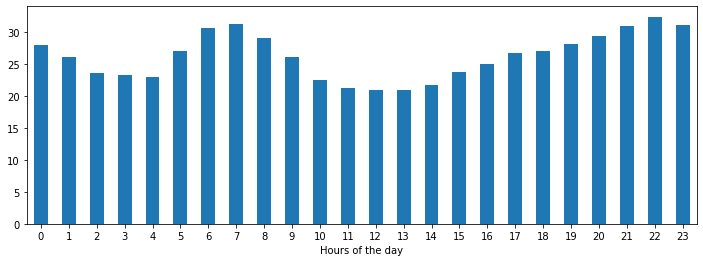

In [21]:
fig,axs = plt.subplots(figsize=(12,4))
air_quality.groupby('hour')['value'].mean().plot(kind='bar',ax=axs,rot=0)  # rot : x축 숫자 세워줌
axs.set_xlabel('Hours of the day')

# Datetime as Index

In [23]:
no2 = air_quality.pivot(index='datetime',columns='location',values='value')
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1033 entries, 2019-05-07 01:00:00+00:00 to 2019-06-21 00:00:00+00:00
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BETR801             95 non-null     float64
 1   FR04014             1004 non-null   float64
 2   London Westminster  969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB


In [24]:
no2.index

DatetimeIndex(['2019-05-07 01:00:00+00:00', '2019-05-07 02:00:00+00:00',
               '2019-05-07 03:00:00+00:00', '2019-05-07 04:00:00+00:00',
               '2019-05-07 05:00:00+00:00', '2019-05-07 06:00:00+00:00',
               '2019-05-07 07:00:00+00:00', '2019-05-07 08:00:00+00:00',
               '2019-05-07 09:00:00+00:00', '2019-05-07 10:00:00+00:00',
               ...
               '2019-06-20 15:00:00+00:00', '2019-06-20 16:00:00+00:00',
               '2019-06-20 17:00:00+00:00', '2019-06-20 18:00:00+00:00',
               '2019-06-20 19:00:00+00:00', '2019-06-20 20:00:00+00:00',
               '2019-06-20 21:00:00+00:00', '2019-06-20 22:00:00+00:00',
               '2019-06-20 23:00:00+00:00', '2019-06-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=1033, freq=None)

In [26]:
no2.index.year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='datetime', length=1033)

In [27]:
no2.index.weekday

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
           dtype='int64', name='datetime', length=1033)

In [28]:
air_quality[0:3]

,city,country,datetime,location,parameter,value,unit,month,year,weekofyear,quarter,hour,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,2019,25,2,0,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,2019,25,2,23,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,2019,25,2,22,3


In [29]:
no2['2019-05-20':'2019-05-21']

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-20 00:00:00+00:00,26.0,16.4,28.0
2019-05-20 01:00:00+00:00,17.0,12.8,28.0
2019-05-20 02:00:00+00:00,10.5,12.1,32.0
2019-05-20 03:00:00+00:00,9.0,12.6,32.0
2019-05-20 04:00:00+00:00,14.0,14.9,26.0
2019-05-20 05:00:00+00:00,20.0,25.2,26.0
2019-05-20 06:00:00+00:00,26.0,40.1,31.0
2019-05-20 07:00:00+00:00,38.0,46.9,31.0
2019-05-20 08:00:00+00:00,40.0,46.1,29.0


#Resample
+ use aggregation function

In [31]:
#월별로 집계
monthly_max = no2.resample('M').max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [34]:
daily_max = no2.resample('D').max()
daily_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 00:00:00+00:00,50.5,77.7,32.0
2019-05-08 00:00:00+00:00,23.0,48.9,40.0
2019-05-09 00:00:00+00:00,20.5,50.7,97.0
2019-05-10 00:00:00+00:00,11.5,60.7,52.0
2019-05-11 00:00:00+00:00,26.5,36.8,37.0
2019-05-12 00:00:00+00:00,20.0,46.5,44.0
2019-05-13 00:00:00+00:00,14.5,45.2,39.0
2019-05-14 00:00:00+00:00,14.5,46.1,34.0
2019-05-15 00:00:00+00:00,25.5,48.1,38.0


In [35]:
daily_max.index.freq

<Day>

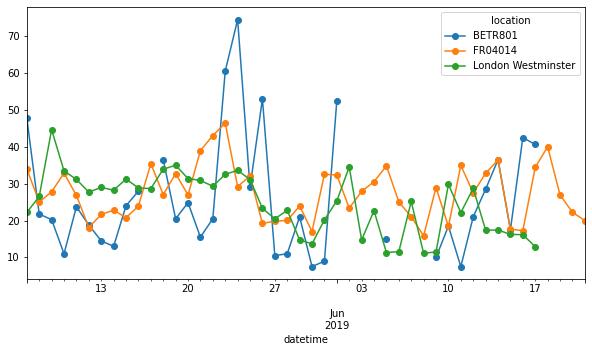

In [39]:
daily_mean = no2.resample('D').mean()
daily_mean.plot(figsize=(10,5),style='-o')